In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#read in the data
eviction_data = pd.read_csv('/content/working.csv', skiprows = [1] ) #skiprows removes extra header row



#Make dataframe
df = pd.DataFrame(eviction_data)
eviction_data


,case_id,case_status,judgement,name,case_type,street,city,state,zip,file_date,next_event_date,plaintiff,docket
0,18H85SP000008,Closed as of 01/17/2018,R 41(a)(1) Voluntary Dismissal,"Wantate, Angela et al",SP Summons and Complaint - Non-payment of Rent,19 Brookside Avenue 14,Worcester,MA,01602,01/02/2018,-666,"Northland Tatnuck, LLC",b'01/02/2018SP Summons and Complaint - Non-pay...
1,18H85SP000012,Active,Case still active,"Kinyanjui, Charles et al",SP Summons and Complaint - Foreclosure,1488 Main Street A,Worcester,MA,01603,01/02/2018,-666,"U.S. Bank National Association, as",b'01/02/2018SP Summons and Complaint - Foreclo...
2,18H85SP000024,Active,Case still active,"Wilson, Lakena",SP Summons and Complaint - Non-payment of Rent,4 Rice Lane 1,Worcester,MA,01604,01/02/2018,-666,"Do, Dung Kim",b'01/02/2018SP Summons and Complaint - Non-pay...
3,18H85SP000025,Active,Case still active,"Jaime-Joan, Gbade et al",SP Summons and Complaint - Non-payment of Rent,12 Perry Avenue 1,Worcester,MA,01604,01/02/2018,-666,"Do, Dung Kim",b'01/02/2018SP Summons and Complaint - Non-pay...
4,18H85SP000028,Closed as of 02/01/2018,R 41(a)(1) Voluntary Dismissal,"Dufresne, David et al",SP Summons and Complaint - Non-payment of Rent,15-E Gibbs Street E,Worcester,MA,01607,01/05/2018,-666,"Kaminski, Tomasi",b'01/05/2018SP Summons and Complaint - Non-pay...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,21H85SP003856,Active,Case still active,"Morales, Jaime",Efiled SP Summons and Complaint - No Cause,76 Elm Street 1A,Worcester,MA,1609,12/29/2021,-666,"Peixoto, Gleidison",b'12/29/2021Summary Process: MGL Chapter 185C ...
8864,21H85SP003857,Active,Case still active,"Miranda, Jaime",Efiled SP Summons and Complaint - No Cause,76 Elm Street 1B,Worcester,MA,1609,12/29/2021,-666,"Peixoto, Gleidison","b""12/29/2021Summary Process: MGL Chapter 185C ..."
8865,21H85SP003862,Active,Case still active,"Dejesus, Pablo",Efiled SP Summons and Complaint - No Cause,76 Elm Street 2C,Worcester,MA,1609,12/29/2021,-666,"Peixoto, Gleidison",b'12/29/2021Summary Process: MGL Chapter 185C ...
8866,21H85SP003861,Active,Case still active,"Arguin, Jonathan",Efiled SP Summons and Complaint - No Cause,76 Elm Street,Worcester,MA,1609,12/29/2021,-666,"Peixoto, Gleidison",b'12/29/2021Summary Process: MGL Chapter 185C ...


In [2]:
#Visualization 1: Multi-line plot of number of evictions per month per year 
  #make month list, assign it the first two characters in file_date string
month = []
month = eviction_data.file_date.str[:2]
eviction_data = eviction_data.assign(month = month)
#eviction_data

In [3]:
#Make new column with year
  #make year list, assign it the first two characters in file_date string
year = []
year = eviction_data.file_date.str[8:]
eviction_data = eviction_data.assign(year = year)
#eviction_data

In [4]:
evictcounts = eviction_data.groupby(["year", "month"]).count()
#evictcounts.head(50)

In [5]:
#I want to pull the case_id and month based on the year value 
elist = evictcounts['case_id'].tolist()
e2017 = elist[18:30]
e2017
e2018 = elist[30:42]
e2018
e2019 = elist[42:54]
e2020 = elist[54:66]
e2021 = elist[66:78]

#col_one_list = df['one'].tolist()

In [6]:
monthlist = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
#monthlist

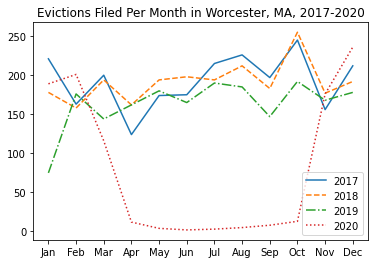

In [7]:


plt.plot(monthlist, e2017, label = "2017", linestyle="-")
plt.plot(monthlist, e2018, label = "2018", linestyle="--")
plt.plot(monthlist, e2019, label = "2019", linestyle="-.")
plt.plot(monthlist, e2020, label = "2020", linestyle=":")
#plt.plot(monthlist, e2021, label = "2021", linestyle="-")
plt.title('Evictions Filed Per Month in Worcester, MA, 2017-2020') 
plt.legend()
plt.show()

In [8]:
evictcountszip = eviction_data.groupby(["zip"]).count()
#evictcountszip2 = evictcountszip.loc[evictcountszip["zip"] == '01610']
evictcountszip
    
#I have taken a shortcut here: I did not clean the zipcode data properly, and about 30% of the zipcode
#data are missing '0' in the front (1610 instead of 01610, for instance). For simplicity's sake, 
#I am only using the rows where the count was recorded properly. 


,case_id,case_status,judgement,name,case_type,street,city,state,file_date,next_event_date,plaintiff,docket,month,year
zip,,,,,,,,,,,,,,
01601,7,7,7,7,7,7,7,7,7,7,7,7,7,7
01602,393,393,393,393,393,393,393,393,393,393,393,393,393,393
01603,730,730,730,730,730,730,730,730,730,730,730,730,730,730
01604,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188
01605,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
01605-0156,1,1,1,1,1,1,1,1,1,1,1,1,1,1
01606,357,357,357,357,357,357,357,357,357,357,357,357,357,357
01607,368,368,368,368,368,368,368,368,368,368,368,368,368,368
01608,514,514,514,514,514,514,514,514,514,514,514,514,514,514


In [9]:
count01601 = evictcountszip.at['01601', 'case_id']
count01602 = evictcountszip.at['01602', 'case_id']
count01603 = evictcountszip.at['01603', 'case_id']
count01604 = evictcountszip.at['01604', 'case_id']
count01605 = evictcountszip.at['01605', 'case_id']
count01606 = evictcountszip.at['01606', 'case_id']
count01607 = evictcountszip.at['01607', 'case_id']
count01608 = evictcountszip.at['01608', 'case_id']
count01609 = evictcountszip.at['01609', 'case_id']
count01610 = evictcountszip.at['01610', 'case_id']
count1602 = evictcountszip.at['1602', 'case_id']
count1603 = evictcountszip.at['1603', 'case_id']
count1604 = evictcountszip.at['1604', 'case_id']
count1605 = evictcountszip.at['1605', 'case_id']
count1606 = evictcountszip.at['1606', 'case_id']
count1607 = evictcountszip.at['1607', 'case_id']
count1608 = evictcountszip.at['1608', 'case_id']
count1609 = evictcountszip.at['1609', 'case_id']
count1610 = evictcountszip.at['1610', 'case_id']
count01602 = count01602 + count1602
count01603 = count01603 + count1603
count01604 = count01604 + count1604
count01605 = count01605 + count1605
count01606 = count01606 + count1606
count01607 = count01607 + count1607
count01608 = count01608 + count1608
count01609 = count01609 + count1609
count01610 = count01610 + count1610

In [10]:
count01602

470

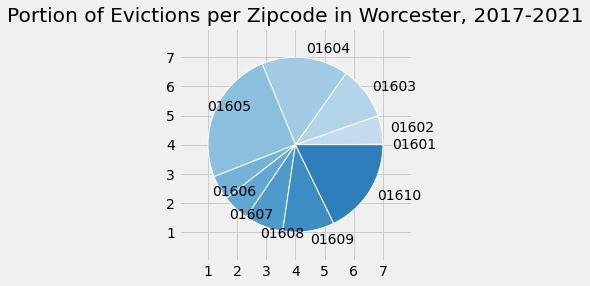

In [15]:
#Visualization 2: Pie chart of evictions by zipcode
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('fivethirtyeight')


# make data
x = [count01601, count01602, count01603, count01604, count01605, count01606, count01607, count01608, count01609, count01610]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, labels=['01601','01602','01603','01604', '01605', '01606', '01607', '01608', '01609', '01610'], radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.title("Portion of Evictions per Zipcode in Worcester, 2017-2021")
plt.show()

ConversionError: ignored

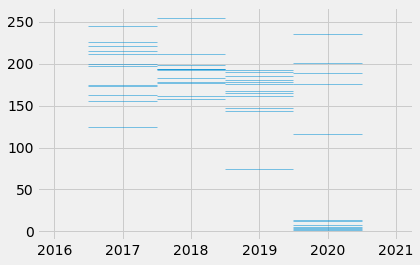

In [22]:
#Visualization 3: Event plot of evictions in 2020 
#Note this isn't in chronological order but highlights the relative distribution of evictions in a given year
#Note works despite the error, its due to the yticks but it shows the actual graph better
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery')

# make data:
x = [2017, 2018, 2019, 2020]
D = [e2017, e2018, e2019, e2020]

# plot:
fig, ax = plt.subplots()

ax.eventplot(D, orientation="vertical", lineoffsets=x, linewidth=0.5)

ax.set(xlim=(2017, 2020), xticks=np.arange(1, 8),
       ylim=(0, 250), yticks= monthlist)

plt.show()